In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

WT_NORM: 
       Mutation  PIK3IP1 Patient_Type
S102  Wildtype  -1.2200       Normal
S103  Wildtype  -0.2820       Normal
S104  Wildtype  -0.1140       Normal
S105  Wildtype   0.5490       Normal
S106  Wildtype   0.5270       Normal
S107  Wildtype   0.2250       Normal
S108  Wildtype   0.6490       Normal
S109  Wildtype   0.3890       Normal
S110  Wildtype   0.8960       Normal
S111  Wildtype   0.1990       Normal
S113  Wildtype   0.4020       Normal
S114  Wildtype   0.4060       Normal
S115  Wildtype   0.2690       Normal
S117  Wildtype   0.9570       Normal
S118  Wildtype   0.5240       Normal
S119  Wildtype   0.4620       Normal
S120  Wildtype   0.3070       Normal
S121  Wildtype   0.5340       Normal
S122  Wildtype   0.1010       Normal
S123  Wildtype   0.7780       Normal
S124  Wildtype   0.9020       Normal
S125  Wildtype   0.8650       Normal
S126  Wildtype   1.3400       Normal
S128  Wildtype   0.9160       Normal
S130  Wildtype   0.7560       Normal
S131  Wildtype   1.0200    

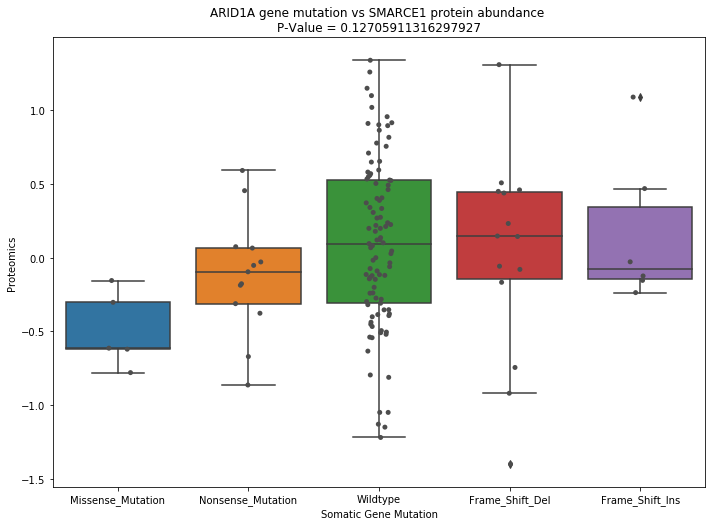

In [12]:
gene = 'ARID1A'
protein = 'PIK3IP1'
cross = CPTAC.compare_mutations(proteomics, protein, gene)
#print(cross)
cross = cross[["Mutation", protein, 'Patient_Type']].dropna(axis=0)
#print(cross)
mutated = cross.loc[cross["Mutation"] != "Wildtype"]
#mutated_cancer = mutated.loc[mutated["Patient_Type"] == "Tumor"]
#print(mutated_cancer)
wt = cross.loc[cross["Mutation"] == "Wildtype"]
wt_cancer = wt.loc[wt["Patient_Type"] == "Tumor"]
wt_normal = wt.loc[wt["Patient_Type"] == "Normal"]

print("WT_NORM: \n", wt_normal)
print("WT_CANC: \n", wt_cancer)
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])


    
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation vs SMARCE1 protein abundance \nP-Value = " + str(ttest[1]))
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()